In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import ticker, cm
from matplotlib.ticker import StrMethodFormatter, NullFormatter
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy import stats
import h5py

# Main Figure 3

In [4]:
fig_width = 4.5                        # inches  
golden_mean = (np.sqrt(5)-1.0)/2.0      # Aesthetic ratio
fig_height = 3.5      # height in inches
dpi = 300.0  
# Margins are specified as a fraction of axes size.
# May need to adjust (especially left and bottom) to accomodate axes labels/tickmarks
leftmargin = 0.15
bottommargin = 0.2
rightmargin = 0.05
topmargin = 0.1
# These two parameters are used for adjusting spacing between subplots (when used)
wspace = 0.2
hspace = 0.2

fig_size =  [fig_width,fig_height]
params = {'backend': 'svg',
          'axes.labelsize': 12,
          'axes.titlesize': 12,
          'legend.fontsize': 10,
          'xtick.labelsize': 12,
          'ytick.labelsize': 12,
          'figure.figsize': fig_size,
          'text.usetex': False, 
          'font.family':'sans-serif',
          'font.sans-serif':'Arial',
          'svg.fonttype':'none'}

# Flux PCA

In [204]:
df = pd.read_csv("/Users/glmarschmann/.julia/dev/DEBmicroTrait/files/isolates_batch_model_fluxes.csv")
#df = df.loc[(df.response == "positive") | (df.response == "negative")]
df_high = df[df.rgrowth >  0.041]
df_low = df[df.rgrowth <  0.04]
df_high = df_high.dropna()
df_low = df_low.dropna()
df_high["turnover"] = df_high["jV"] + df_high['jE']
df_low["turnover"] = df_low["jV"] + df_low['jE']
df.head()

,rgrowth,xenzyme,rGco2,rMco2,rXco2,jEX,jDE,jDEco2,jD,jED,jV,jE,dreserve,response,isolate,ontology
0,0.059213,0.000457,0.000261,0.000088,2.014209e-06,0.000007,0.001366,0.000455,0.001821,0.000004,0.001285,0.000004,0.081456,positive,Acidobacteriaceae bacterium URHE0068,Amino acids
1,0.127318,0.000419,0.000630,0.000008,2.072272e-06,0.000002,0.001126,0.000375,0.001501,0.000002,0.000929,0.000002,0.136902,negative,Bacillus sp. URHB0009,Amino acids
2,0.097510,0.000225,0.000470,0.000009,1.085467e-06,0.000002,0.001211,0.000404,0.001615,0.000002,0.001169,0.000002,0.100524,undefined,Blastococcus sp. URHD0036,Amino acids
3,0.057814,0.000085,0.000253,0.000117,3.711103e-07,0.000001,0.001369,0.000456,0.001826,0.000003,0.001256,0.000003,0.071506,positive,Bradyrhizobium sp. URHA0002,Amino acids
4,0.060674,0.000116,0.000246,0.000148,4.680717e-07,0.000002,0.001378,0.000459,0.001837,0.000003,0.001266,0.000003,0.072229,positive,Bradyrhizobium sp. URHA0013,Amino acids


## High growth regime

In [148]:
features = ['rGco2', 'rMco2', 'jDEco2', 'rXco2', 'turnover', 'dreserve']

In [149]:
x = df_high.loc[:, features].values# Separating out the target
y = df_high.loc[:,['response']].values# Standardizing the features
x = StandardScaler().fit_transform(x)

In [150]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [151]:
finalDf = pd.concat([principalDf, df_high[['response']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,response
0,-0.667129,0.133432,positive
1,0.933191,0.533443,negative
2,-0.023052,0.749472,undefined
3,-1.537262,0.398557,positive
4,-1.633412,0.195425,positive


In [152]:
xs = principalComponents[:,0]
ys = principalComponents[:,1]
scalex = 1.0/(xs.max() - xs.min())
scaley = 1.0/(ys.max() - ys.min())
df_high['pc1'] = xs*scalex
df_high['pc2'] = ys*scaley
df_high_grouped = df_high.groupby('response').mean()
df_high_grouped.head()

,rgrowth,xenzyme,rGco2,rMco2,rXco2,jEX,jDE,jDEco2,jD,jED,jV,jE,dreserve,turnover,pc1,pc2
response,,,,,,,,,,,,,,,,
negative,0.075963,0.000337,0.000503,0.000039,0.000002,0.000003,0.001310,0.000328,0.001638,0.000002,0.001106,0.000002,0.083893,0.001109,0.015670,-0.051490
positive,0.068021,0.000184,0.000399,0.000092,0.000001,0.000003,0.001495,0.000382,0.001878,0.000003,0.001268,0.000003,0.073309,0.001271,-0.052451,-0.013506
undefined,0.099919,0.000302,0.000598,0.000008,0.000002,0.000003,0.001528,0.000390,0.001918,0.000003,0.001484,0.000003,0.097256,0.001487,0.059248,0.058306


In [134]:
pca.explained_variance_ratio_

array([0.38333518, 0.21138702])

<Axes:>

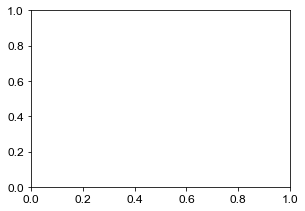

In [135]:
plt.rcParams.update(params)
plt.figure(1)
plt.clf()
plt.axes([leftmargin,
            bottommargin,
            1.0 - rightmargin-leftmargin,
            1.0 - topmargin-bottommargin])

Text(0, 0.5, 'PC 2 (38% explained var.)')

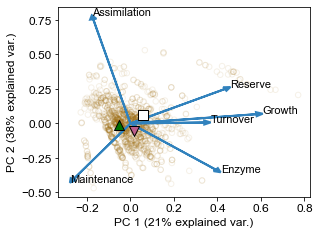

In [136]:
features =['Growth', 'Maintenance', 'Assimilation', 'Enzyme', 'Turnover', 'Reserve']
plt.scatter(df_high['pc1'],df_high['pc2'], s=30, marker='o', edgecolor='#a6761d', alpha=0.1, color='none')
x=np.linspace(start=-1,stop=1,num=500)
y_positive=lambda x: np.sqrt(1-x**2) 
y_negative=lambda x: -np.sqrt(1-x**2)
#plt.plot(x,list(map(y_positive, x)), color='k', lw=1)
#plt.plot(x,list(map(y_negative, x)),color='k', lw=1)
x=np.linspace(start=-1,stop=1,num=30)
#plt.scatter(x,[0]*len(x), marker='_',color='k', lw=1)
#plt.scatter([0]*len(x), x, marker='|',color='k', lw=1)
add_string=""
for i in range(len(values[0])):
    xi=values[0][i]
    yi=values[1][i]
    plt.arrow(0,0, 
              dx=xi, dy=yi, 
              head_width=0.03, head_length=0.03, lw=2,
              color='#3182bd', length_includes_head=True)
    add_string=""
    add_string=f" ({round(xi,2)} {round(yi,2)})"
    plt.text(values[0, i], 
             values[1, i] , 
             s=features[i], size=11)

plt.scatter(df_high_grouped['pc1'][1],df_high_grouped['pc2'][1], s=100, marker='^', color='#007100', edgecolor='k')
plt.scatter(df_high_grouped['pc1'][0],df_high_grouped['pc2'][0], s=100, marker= 'v', color='#bd5e8b', edgecolor='k')
plt.scatter(df_high_grouped['pc1'][2],df_high_grouped['pc2'][2], s=100, marker= 's', color='w', edgecolor='k')
ax = plt.gca()
ax.set_yticks([-0.5, -0.25, 0, 0.25, 0.5,0.75])
ax.set_xlabel("PC 1 (21% explained var.)")
ax.set_ylabel("PC 2 (38% explained var.)")
#plt.savefig("/Users/glmarschmann/.julia/dev/DEBmicroTrait/pnas/figures_main/batch_high_pca.svg", format='svg')

In [110]:
df_high.to_csv('/Users/glmarschmann/.julia/dev/DEBmicroTrait/files/isolates_batch_model_fluxes_high.csv')

## Low growth regime 

In [205]:
features = ['rGco2', 'rMco2', 'jDEco2', 'rXco2', 'turnover', 'dreserve']

In [206]:
x = df_low.loc[:, features].values# Separating out the target
y = df_low.loc[:,['response']].values# Standardizing the features
x = StandardScaler().fit_transform(x)

In [207]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [208]:
values = pca.components_

In [209]:
finalDf = pd.concat([principalDf, df_low[['response']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,response
0,2.824385,-0.399912,NaN
1,2.463360,-0.442121,NaN
2,2.614647,-0.033798,NaN
3,2.838731,0.667397,NaN
4,-1.498301,0.011894,NaN


In [210]:
xs = principalComponents[:,0]
ys = principalComponents[:,1]
scalex = 1.0/(xs.max() - xs.min())
scaley = 1.0/(ys.max() - ys.min())
df_low['pc1'] = xs*scalex
df_low['pc2'] = ys*scaley
df_low_grouped = df_low.groupby('response').mean()
df_low_grouped.head()

,rgrowth,xenzyme,rGco2,rMco2,rXco2,jEX,jDE,jDEco2,jD,jED,jV,jE,dreserve,turnover,pc1,pc2
response,,,,,,,,,,,,,,,,
negative,0.012114,0.000056,0.000159,0.000005,7.621929e-07,8.509180e-07,0.000376,0.000080,0.000455,6.381508e-07,0.000256,6.381508e-07,0.013066,0.000257,-0.058733,-0.044889
positive,0.016839,0.000056,0.000158,0.000033,4.189700e-07,1.262579e-06,0.000651,0.000146,0.000797,1.524069e-06,0.000544,1.524069e-06,0.022387,0.000545,0.032579,0.034580
undefined,0.013893,0.000050,0.000175,0.000002,5.800181e-07,9.955312e-07,0.000486,0.000101,0.000587,9.681393e-07,0.000399,9.681393e-07,0.017393,0.000400,-0.025280,-0.037084


In [211]:
pca.explained_variance_ratio_

array([0.61220044, 0.15881581])

<Axes:>

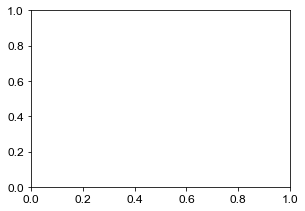

In [212]:
plt.rcParams.update(params)
plt.figure(1)
plt.clf()
plt.axes([leftmargin,
            bottommargin,
            1.0 - rightmargin-leftmargin,
            1.0 - topmargin-bottommargin])

Text(0, 0.5, 'PC 2 (61% explained var.)')

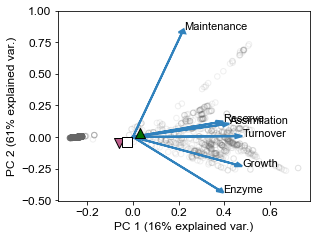

In [213]:
features =['Growth', 'Maintenance', 'Assimilation', 'Enzyme', 'Turnover', 'Reserve']
plt.scatter(df_low['pc1'],df_low['pc2'], s=30, marker='o', edgecolor='#666666', alpha=0.1, color='none')
x=np.linspace(start=-1,stop=1,num=500)
y_positive=lambda x: np.sqrt(1-x**2) 
y_negative=lambda x: -np.sqrt(1-x**2)
#plt.plot(x,list(map(y_positive, x)), color='k', lw=1)
#plt.plot(x,list(map(y_negative, x)),color='k', lw=1)
x=np.linspace(start=-1,stop=1,num=30)
#plt.scatter(x,[0]*len(x), marker='_',color='k', lw=1)
#plt.scatter([0]*len(x), x, marker='|',color='k', lw=1)
add_string=""
for i in range(len(values[0])):
    xi=values[0][i]
    yi=values[1][i]
    plt.arrow(0,0, 
              dx=xi, dy=yi, 
              head_width=0.03, head_length=0.03, lw=2,
              color='#3182bd', length_includes_head=True)
    add_string=""
    add_string=f" ({round(xi,2)} {round(yi,2)})"
    plt.text(values[0, i], 
             values[1, i] , 
             s=features[i], size=11)

plt.scatter(df_low_grouped['pc1'][1],df_low_grouped['pc2'][1], s=100, marker='^', color='#007100', edgecolor='k')
plt.scatter(df_low_grouped['pc1'][0],df_low_grouped['pc2'][0], s=100, marker= 'v', color='#bd5e8b', edgecolor='k')
plt.scatter(df_low_grouped['pc1'][2],df_low_grouped['pc2'][2], s=100, marker= 's', color='w', edgecolor='k')
ax = plt.gca()
ax.set_yticks([-0.5, -0.25, 0, 0.25, 0.5, 0.75,1])
ax.set_xlabel("PC 1 (16% explained var.)")
ax.set_ylabel("PC 2 (61% explained var.)")
#plt.savefig("/Users/glmarschmann/.julia/dev/DEBmicroTrait/pnas/figures_main/batch_low_pca.svg", format='svg')

In [214]:
df_low.to_csv('/Users/glmarschmann/.julia/dev/DEBmicroTrait/files/isolates_batch_model_fluxes_low.csv')

# Power-Yield

In [117]:
df_bge = pd.read_csv("/Users/glmarschmann/.julia/dev/DEBmicroTrait/files/isolates_batch_model_BGE.csv")
df_bge = df_bge.dropna()

## Regression

In [84]:
df_bge_p_sugars = df_bge.loc[(df_bge.response == "positive") & (df_bge.ontology == "Sugars")]
df_bge_p_organics = df_bge.loc[(df_bge.response == "positive") & (df_bge.ontology == "Organic acids")]
df_bge_p_aminos = df_bge.loc[(df_bge.response == "positive") & (df_bge.ontology == "Amino acids")]
df_bge_p_fattys = df_bge.loc[(df_bge.response == "positive") & (df_bge.ontology == "Fatty acids")]
df_bge_p_nucleos = df_bge.loc[(df_bge.response == "positive") & (df_bge.ontology == "Nucleotides")]
df_bge_p_auxins = df_bge.loc[(df_bge.response == "positive") & (df_bge.ontology == "Auxins")]
df_bge_n_sugars = df_bge.loc[(df_bge.response == "negative") & (df_bge.ontology == "Sugars")]
df_bge_n_organics = df_bge.loc[(df_bge.response == "negative") & (df_bge.ontology == "Organic acids")]
df_bge_n_aminos = df_bge.loc[(df_bge.response == "negative") & (df_bge.ontology == "Amino acids")]
df_bge_n_fattys = df_bge.loc[(df_bge.response == "negative") & (df_bge.ontology == "Fatty acids")]
df_bge_n_nucleos = df_bge.loc[(df_bge.response == "negative") & (df_bge.ontology == "Nucleotides")]
df_bge_n_auxins = df_bge.loc[(df_bge.response == "negative") & (df_bge.ontology == "Auxins")]
df_bge_u_sugars = df_bge.loc[(df_bge.response == "undefined") & (df_bge.ontology == "Sugars")]
df_bge_u_organics = df_bge.loc[(df_bge.response == "undefined") & (df_bge.ontology == "Organic acids")]
df_bge_u_aminos = df_bge.loc[(df_bge.response == "undefined") & (df_bge.ontology == "Amino acids")]
df_bge_u_fattys = df_bge.loc[(df_bge.response == "undefined") & (df_bge.ontology == "Fatty acids")]
df_bge_u_nucleos = df_bge.loc[(df_bge.response == "undefined") & (df_bge.ontology == "Nucleotides")]
df_bge_u_auxins = df_bge.loc[(df_bge.response == "undefined") & (df_bge.ontology == "Auxins")]
#
bge_grouped = df_bge.groupby(["response", "ontology"]).median()
df_bge_high = bge_grouped[bge_grouped.rgrowth >  0.041]
df_bge_low = bge_grouped[bge_grouped.rgrowth <  0.0407]

In [85]:
df_bge_high.head()

mingt       BGE   rgrowth            BP            BR
response  ontology                                                          
negative  Amino acids   3.16  0.482094  0.077103  1.034778e-08  6.999252e-09
          Sugars        3.16  0.498416  0.066856  8.987512e-09  6.006086e-09
positive  Amino acids   5.32  0.576385  0.057780  7.419594e-09  3.292241e-09
undefined Amino acids   3.45  0.512486  0.065136  8.665203e-09  5.688567e-09
          Sugars        3.45  0.535742  0.062709  8.540205e-09  4.680757e-09

<Axes:>

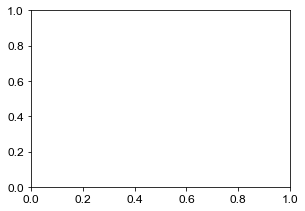

In [86]:
plt.rcParams.update(params)
plt.figure(1)
plt.clf()
plt.axes([leftmargin,
            bottommargin,
            1.0 - rightmargin-leftmargin,
            1.0 - topmargin-bottommargin])

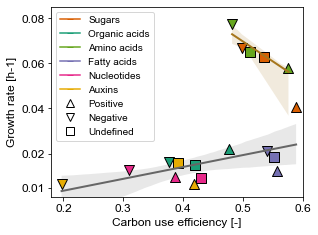

In [87]:
ax = plt.gca()
ax = sns.regplot(x="BGE", y="rgrowth", data=df_bge_high, marker="", line_kws={"color":"#a6761d","alpha":1.0,"lw":2})
ax = sns.regplot(x="BGE", y="rgrowth", data=df_bge_low, marker="", line_kws={"color":"#666666","alpha":1.0,"lw":2})

plt.scatter(np.median(df_bge_p_sugars.BGE), np.median(df_bge_p_sugars.rgrowth), s=100, color='#d95f02', edgecolor='k', marker='^', label="")
plt.scatter(np.median(df_bge_p_organics.BGE), np.median(df_bge_p_organics.rgrowth), s=100, c='#1b9e77', edgecolor='k',marker='^', label="")
plt.scatter(np.median(df_bge_p_aminos.BGE), np.median(df_bge_p_aminos.rgrowth), s=100, c='#66a61e',edgecolor='k', marker='^',label="")
plt.scatter(np.median(df_bge_p_fattys.BGE), np.median(df_bge_p_fattys.rgrowth), s=100, c='#7570b3',edgecolor='k', marker='^',label="")
plt.scatter(np.median(df_bge_p_nucleos.BGE), np.median(df_bge_p_nucleos.rgrowth), s=100, c='#e7298a',edgecolor='k', marker='^',label="")
plt.scatter(np.median(df_bge_p_auxins.BGE), np.median(df_bge_p_auxins.rgrowth), s=100, c='#e6ab02',edgecolor='k', marker='^',label="")
plt.scatter(np.median(df_bge_n_sugars.BGE), np.median(df_bge_n_sugars.rgrowth), s=100, c='#d95f02',edgecolor='k', marker='v',label="")
plt.scatter(np.median(df_bge_n_organics.BGE), np.median(df_bge_n_organics.rgrowth), s=100, c='#1b9e77',edgecolor='k', marker='v',label="")
plt.scatter(np.median(df_bge_n_aminos.BGE), np.median(df_bge_n_aminos.rgrowth), s=100, c='#66a61e',edgecolor='k', marker='v',label="")
plt.scatter(np.median(df_bge_n_fattys.BGE), np.median(df_bge_n_fattys.rgrowth), s=100, c='#7570b3',edgecolor='k', marker='v',label="")
plt.scatter(np.median(df_bge_n_nucleos.BGE), np.median(df_bge_n_nucleos.rgrowth), s=100, c='#e7298a',edgecolor='k', marker='v',label="")
plt.scatter(np.median(df_bge_n_auxins.BGE), np.median(df_bge_n_auxins.rgrowth), s=100, c='#e6ab02',edgecolor='k', marker='v',label="")
plt.scatter(np.median(df_bge_u_sugars.BGE), np.median(df_bge_u_sugars.rgrowth), s=100, c='#d95f02',edgecolor='k', marker='s', label="Sugars")
plt.scatter(np.median(df_bge_u_organics.BGE), np.median(df_bge_u_organics.rgrowth), s=100, c='#1b9e77',edgecolor='k', marker='s', label="Organic acids")
plt.scatter(np.median(df_bge_u_aminos.BGE), np.median(df_bge_u_aminos.rgrowth), s=100, c='#66a61e',edgecolor='k', marker='s', label="Amino acids")
plt.scatter(np.median(df_bge_u_fattys.BGE), np.median(df_bge_u_fattys.rgrowth), s=100, c='#7570b3',edgecolor='k', marker='s', label="Fatty acids")
plt.scatter(np.median(df_bge_u_nucleos.BGE), np.median(df_bge_u_nucleos.rgrowth), s=100, c='#e7298a',edgecolor='k', marker='s', label="Nucleotides")
plt.scatter(np.median(df_bge_u_auxins.BGE), np.median(df_bge_u_auxins.rgrowth), s=100, c='#e6ab02',edgecolor='k', marker='s', label="Auxins")
plt.legend()

ax.set_xlim([0.18, 0.6])
ax.set_ylim([0.001, 0.085])
ax.set(ylabel='Growth rate [h-1]', xlabel='Carbon use efficiency [-]')
ax.set_yticks([0.005, 0.02, 0.04, 0.06, 0.08])
ax.set_yticklabels(["0.01", "0.02", "0.04", "0.06", "0.08"])
ax.set_xticks([0.2, 0.3, 0.4, 0.5, 0.6])
ax.set_xticklabels(["0.2", "0.3", "0.4", "0.5", "0.6"])
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
legend_elements = [
                   Line2D([0], [0], marker='_', color='#d95f02', label='Sugars',
                          markerfacecolor='#d95f02', markersize=6),
                   Line2D([0], [0], marker='_', color='#1b9e77', label='Organic acids',
                          markerfacecolor='#1b9e77', markersize=6),
                   Line2D([0], [0], marker='_', color='#66a61e', label='Amino acids',
                          markerfacecolor='#66a61e', markersize=6),
                   Line2D([0], [0], marker='_', color='#7570b3', label='Fatty acids',
                          markerfacecolor='#7570b3', markersize=6),
                   Line2D([0], [0], marker='_', color='#e7298a', label='Nucleotides',
                          markerfacecolor='#e7298a', markersize=6),
                   Line2D([0], [0], marker='_', color='#e6ab02', label='Auxins',
                          markerfacecolor='#e6ab02', markersize=6),
                   Line2D([0], [0], marker='^', color='w', label='Positive',
                          markerfacecolor='none', mec='k', markersize=8),
                   Line2D([0], [0], marker='v', color='w', label='Negative',
                          markerfacecolor='none', mec='k', markersize=8),
                   Line2D([0], [0], marker='s', color='w', label='Undefined',
                          markerfacecolor='none', mec='k', markersize=8),
]
ax.legend(handles=legend_elements)
#plt.savefig("/Users/glmarschmann/.julia/dev/DEBmicroTrait/pnas/figures_main/batch_growth_cue.svg", format='svg')

## BP-BR scaling

In [121]:
df_bge['BP'] = df_bge['BP'].apply(lambda x: x*1e9)
df_bge['BR'] = df_bge['BR'].apply(lambda x: x*1e9)
df_bge['BP'] = df_bge['BP'].apply(lambda x: np.log(x))
df_bge['BR'] = df_bge['BR'].apply(lambda x: np.log(x))
#
df_bge_high = df_bge[df_bge.rgrowth >  0.041]
df_bge_low = df_bge[df_bge.rgrowth <  0.0407]

In [89]:
df_bge_high_p = df_bge_high.loc[(df_bge_high.response == "positive")]
df_bge_high_n = df_bge_high.loc[(df_bge_high.response == "negative")]
df_bge_high_u = df_bge_high.loc[(df_bge_high.response == "undefined")]
bge_high_grouped_p = df_bge_high_p.groupby(["isolate"]).median()
bge_high_grouped_n = df_bge_high_n.groupby(["isolate"]).median()
bge_high_grouped_u = df_bge_high_u.groupby(["isolate"]).median()
df_bge_low_p = df_bge_low.loc[(df_bge_low.response == "positive")]
df_bge_low_n = df_bge_low.loc[(df_bge_low.response == "negative")]
df_bge_low_u = df_bge_low.loc[(df_bge_low.response == "undefined")]
bge_low_grouped_p = df_bge_low_p.groupby(["isolate"]).median()
bge_low_grouped_n = df_bge_low_n.groupby(["isolate"]).median()
bge_low_grouped_u = df_bge_low_u.groupby(["isolate"]).median()

In [90]:
bge_high_iso = bge_high_grouped_p.append([bge_high_grouped_n, bge_high_grouped_u])
bge_low_iso = bge_low_grouped_p.append([bge_low_grouped_n, bge_low_grouped_u])

In [91]:
import matplotlib.ticker

class OOMFormatter(matplotlib.ticker.ScalarFormatter):
    def __init__(self, order=0, fformat="%1.1f", offset=True, mathText=True):
        self.oom = order
        self.fformat = fformat
        matplotlib.ticker.ScalarFormatter.__init__(self,useOffset=offset,useMathText=mathText)
    def _set_order_of_magnitude(self):
        self.orderOfMagnitude = self.oom
    def _set_format(self, vmin=None, vmax=None):
        self.format = self.fformat
        if self._useMathText:
            self.format = r'$\mathdefault{%s}$' % self.format

<Axes:>

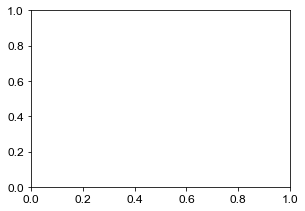

In [92]:
plt.rcParams.update(params)
plt.figure(1)
plt.clf()
plt.axes([leftmargin,
            bottommargin,
            1.0 - rightmargin-leftmargin,
            1.0 - topmargin-bottommargin])

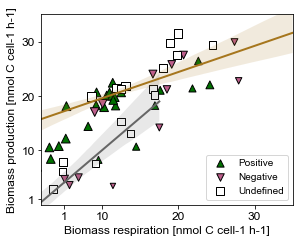

In [93]:
plt.scatter(bge_high_grouped_p.BR, bge_high_grouped_p.BP, s=bge_high_grouped_p.BGE*120, marker='^', color='#007100', edgecolor='k', label="")
plt.scatter(bge_high_grouped_n.BR, bge_high_grouped_n.BP, s=bge_high_grouped_n.BGE*120, marker='v', color='#bd5e8b', edgecolor='k', label="")
plt.scatter(bge_high_grouped_u.BR, bge_high_grouped_u.BP, s=bge_high_grouped_u.BGE*120, marker='s', color='w', edgecolor='k', label="")
plt.scatter(bge_low_grouped_p.BR, bge_low_grouped_p.BP, s=bge_low_grouped_p.BGE*120, marker='^', color='#007100', edgecolor='k', label="Positive")
plt.scatter(bge_low_grouped_n.BR, bge_low_grouped_n.BP, s=bge_low_grouped_n.BGE*120, marker='v', color='#bd5e8b', edgecolor='k', label="Negative")
plt.scatter(bge_low_grouped_u.BR, bge_low_grouped_u.BP, s=bge_low_grouped_u.BGE*120, marker='s', color='w', edgecolor='k', label="Undefined")
ax = plt.gca()
ax.set_xlim([0.2, 3.5])
ax.set_ylim([0.001, 3.5])
ax.set_yticks([0.1,1,2,3])
ax.set_yticklabels(["1","10", "20", "30"])
ax.set_xticks([0.5,1,2,3])
ax.set_xticklabels(["1","10", "20", "30"])
ax = sns.regplot(x="BR", y="BP", data=bge_high_iso, marker="", line_kws={"color":"#a6761d","alpha":1.0,"lw":2}, ci=95, truncate=False)
ax = sns.regplot(x="BR", y="BP", data=bge_low_iso, marker="", line_kws={"color":"#666666","alpha":1.0,"lw":2},ci=95, truncate=True)
ax.set(xlabel="Biomass respiration [nmol C cell-1 h-1]", ylabel="Biomass production [nmol C cell-1 h-1]")
plt.legend(loc="lower right")
#plt.savefig("/Users/glmarschmann/.julia/dev/DEBmicroTrait/pnas/figures_main/batch_resp.svg", format='svg')

# Supplementary Figures

## CUE - growth distributions

<Axes:>

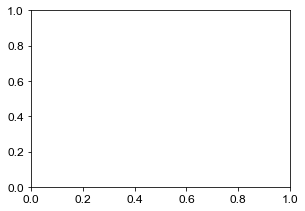

In [94]:
plt.rcParams.update(params)
plt.figure(1)
plt.clf()
plt.axes([leftmargin,
            bottommargin,
            1.0 - rightmargin-leftmargin,
            1.0 - topmargin-bottommargin])

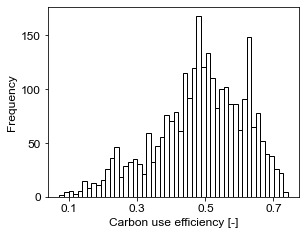

In [95]:
plt.hist(df_bge["BGE"], bins=50, label="Batch simulations", color='w', edgecolor='k')
plt.xlabel("Carbon use efficiency [-]")
plt.ylabel("Frequency")
#plt.legend()
ax = plt.gca()
ax.set_xticks([0.1,0.3,0.5, 0.7])
#plt.savefig("/Users/glmarschmann/.julia/dev/DEBmicroTrait/pnas/figures_suppl/batch_cue_hist.svg", format='svg')

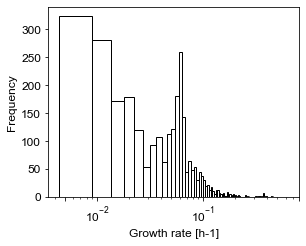

In [96]:
plt.hist(df_bge["rgrowth"], bins=100, label="Batch simulations", color='w', edgecolor='k')
plt.xlabel("Growth rate [h-1]")
plt.ylabel("Frequency")
#plt.legend()
ax = plt.gca()
ax.set_xscale('log')
ax.set_xticks([5e-3,1e-2,1e-1, 8e-1])
#plt.savefig("/Users/glmarschmann/.julia/dev/DEBmicroTrait/pnas/figures_suppl/batch_growth_hist.svg", format='svg')

In [78]:
# Growth benchmarks

<Axes:>

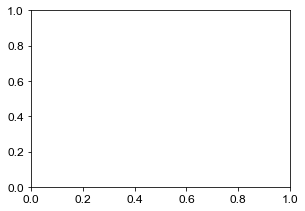

In [97]:
plt.rcParams.update(params)
plt.figure(1)
plt.clf()
plt.axes([leftmargin,
            bottommargin,
            1.0 - rightmargin-leftmargin,
            1.0 - topmargin-bottommargin])

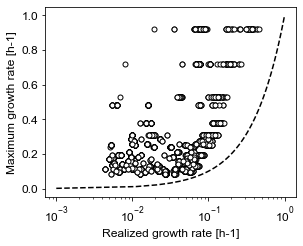

In [226]:
plt.scatter(df_bge["rgrowth"], np.log(2)/df_bge["mingt"], s=25, color='w', edgecolor='k' )
x = np.linspace(1e-3,1,100)
y = x
plt.plot(x, y, '--', c='k', label="")
plt.xlabel("Realized growth rate [h-1]")
plt.ylabel("Maximum growth rate [h-1]")
plt.xscale('log')
plt.savefig("/Users/glmarschmann/.julia/dev/DEBmicroTrait/pnas/figures_suppl/suppl_growth_comp.svg", format='svg')

In [217]:
df_glucose = pd.read_csv("/Users/glmarschmann/.julia/dev/DEBmicroTrait/files/isolates_batch_model_media.csv")
df_glucose.shape

(39, 3)

In [221]:
df_glucose_non=df_glucose.drop(df_glucose.index[[10,28,29]])
df_glucose_non.shape

L=[10,28,29]
df_glucose_out=df_glucose.iloc[L]

<Axes:>

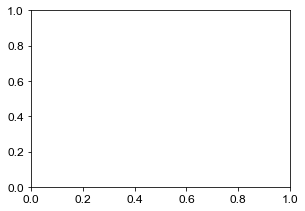

In [222]:
plt.rcParams.update(params)
plt.figure(1)
plt.clf()
plt.axes([leftmargin,
            bottommargin,
            1.0 - rightmargin-leftmargin,
            1.0 - topmargin-bottommargin])

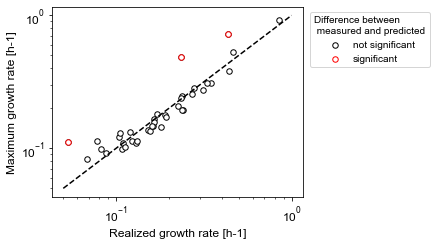

In [225]:
# 4
plt.scatter(df_glucose["rmedian"], df_glucose["gmax"], s=30, color='w', edgecolor='k', label='not significant' )
plt.scatter(df_glucose_out["rmedian"], df_glucose_out["gmax"], s=30, color='w', edgecolor='r', label='significant' )
x = np.linspace(5e-2,1,100)
y = x
plt.plot(x, y, '--', c='k', label="")
plt.xlabel("Realized growth rate [h-1]")
plt.ylabel("Maximum growth rate [h-1]")
plt.xscale('log')
plt.yscale('log')
plt.legend(title="Difference between\n measured and predicted", bbox_to_anchor=(1.01, 1))
plt.savefig("/Users/glmarschmann/.julia/dev/DEBmicroTrait/pnas/figures_suppl/suppl_growth_benchmark.svg", format='svg')

## CUE boxplot

In [115]:
fig_width = 6.2                         # inches  
golden_mean = (np.sqrt(5)-1.0)/2.0      # Aesthetic ratio
fig_height = fig_width*golden_mean      # height in inches
dpi = 300.0                             # Convert inch to pt

# Margins are specified as a fraction of axes size.
# May need to adjust (especially left and bottom) to accomodate axes labels/tickmarks
leftmargin = 0.15
bottommargin = 0.2
rightmargin = 0.05
topmargin = 0.1
# These two parameters are used for adjusting spacing between subplots (when used)
wspace = 0.2
hspace = 0.2

fig_size =  [fig_width,fig_height]
params = {'backend': 'svg',
          'axes.labelsize': 12,
          'axes.titlesize': 12,
          'legend.fontsize': 10,
          'xtick.labelsize': 10,
          'ytick.labelsize': 12,
          'figure.figsize': fig_size,
          'text.usetex': False, 
          'font.family':'sans-serif',
          'font.sans-serif':'Arial',
          'svg.fonttype':'none'}

<Axes:>

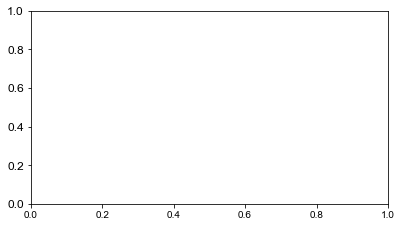

In [116]:
plt.rcParams.update(params)
plt.figure(1)
plt.clf()
plt.axes([leftmargin,
            bottommargin,
            1.0 - rightmargin-leftmargin,
            1.0 - topmargin-bottommargin])

In [118]:
df_bge_pn = df_bge.loc[(df_bge.response == "positive") | (df_bge.response == "negative")]

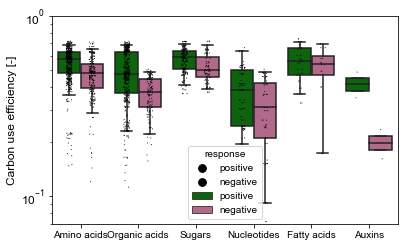

In [120]:
ax = plt.gca()
ax = sns.stripplot(x="ontology", y="BGE", hue="response", palette =["k", 'k'], data=df_bge_pn, dodge=True, size=1, order=[
                 'Amino acids', 'Organic acids', 'Sugars', 'Nucleotides', 'Fatty acids', 'Auxins'])
ax = sns.boxplot(x="ontology", y="BGE", hue="response", data=df_bge_pn, palette =["#007100", '#bd5e8b'], showfliers=False,  whis=[5, 95], order=[
                 'Amino acids', 'Organic acids', 'Sugars', 'Nucleotides', 'Fatty acids', 'Auxins'])
ax.set(yscale="log")
ax.set(ylabel='Carbon use efficiency [-]', xlabel='')
ax.set_ylim([7e-2, 1e0])
plt.savefig("/Users/glmarschmann/.julia/dev/DEBmicroTrait/pnas/figures_suppl/isolates_batch_model_bge_pn.svg", format="svg")

In [126]:
df_bge_low = pd.read_csv('/Users/glmarschmann/.julia/dev/DEBmicroTrait/files/isolates_batch_model_fluxes_low.csv')
df_low_pn = df_bge_low.loc[(df_bge_low.response == "positive") | (df_bge_low.response == "negative")]
df_low_pn["mfrac"] = df_low_pn["rMco2"]/(df_low_pn["rMco2"] + df_low_pn["rGco2"] + df_low_pn["rXco2"])

/Users/glmarschmann/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [127]:
fig_width = 0.9                       # inches  
golden_mean = (np.sqrt(5)-1.0)/2.0      # Aesthetic ratio
fig_height = 1.607      # height in inches
dpi = 300.0                             # Convert inch to pt

# Margins are specified as a fraction of axes size.
# May need to adjust (especially left and bottom) to accomodate axes labels/tickmarks
leftmargin = 0.15
bottommargin = 0.2
rightmargin = 0.05
topmargin = 0.1
# These two parameters are used for adjusting spacing between subplots (when used)
wspace = 0.2
hspace = 0.2

fig_size =  [fig_width,fig_height]
params = {'backend': 'svg',
          'axes.labelsize': 8,
          'axes.titlesize': 10,
          'legend.fontsize': 6,
          'xtick.labelsize': 6,
          'ytick.labelsize': 8,
          'figure.figsize': fig_size,
          'text.usetex': False, 
          'font.family':'sans-serif',
          'font.sans-serif':'Arial',
          'svg.fonttype':'none'}

<Axes:>

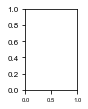

In [128]:
plt.rcParams.update(params)
plt.figure(1)
plt.clf()
plt.axes([leftmargin,
            bottommargin,
            1.0 - rightmargin-leftmargin,
            1.0 - topmargin-bottommargin])

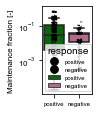

In [131]:
ax = plt.gca()
ax = sns.stripplot(x="response", y="mfrac", hue="response", palette =["k", 'k'], data=df_low_pn, dodge=False, size=1, label='')
ax = sns.boxplot(x="response", y="mfrac", hue="response", data=df_low_pn, palette =["#007100", '#bd5e8b'], dodge=False, showfliers=False)
ax.set(yscale="log")
ax.set(ylabel='Maintenance fraction [-]', xlabel='')
#from matplotlib.ticker import ScalarFormatter
#formatter0 = EngFormatter(unit='Hz')
#ax.yaxis.set_major_formatter('{x:.0f}')
#ax.yaxis.set_minor_formatter('{x:.0f}')
plt.savefig("/Users/glmarschmann/.julia/dev/DEBmicroTrait/pnas/figures_suppl/suppl_mfrac.svg", format="svg")

<Axes:>

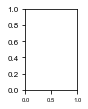

In [132]:
plt.rcParams.update(params)
plt.figure(1)
plt.clf()
plt.axes([leftmargin,
            bottommargin,
            1.0 - rightmargin-leftmargin,
            1.0 - topmargin-bottommargin])

In [139]:
df = pd.read_csv("/Users/glmarschmann/.julia/dev/DEBmicroTrait/files/isolates_batch_model_fluxes.csv")
df_bge_pn = df.loc[(df.response == "positive") | (df.response == "negative")]
df_bge_pn.loc[df_bge_pn['rgrowth'] >= 0.041, 'growthregime'] = 'high' 
df_bge_pn.loc[df_bge_pn['rgrowth'] < 0.04, 'growthregime'] = 'low' 
df_bge_pn["turnover"] = df_bge_pn["jV"] + df_bge_pn['jE']

/Users/glmarschmann/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


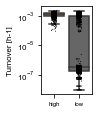

In [141]:
ax = plt.gca()
ax = sns.stripplot(x="growthregime", y="turnover", palette =["k", 'k'], data=df_bge_pn, dodge=False, size=1, label='')
ax = sns.boxplot(x="growthregime", y="turnover", data=df_bge_pn, palette =["#a6761d", '#666666'], dodge=False, showfliers=False)
ax.set(yscale="log")
ax.set(ylabel='Turnover [h-1]', xlabel='')
#from matplotlib.ticker import ScalarFormatter
#formatter0 = EngFormatter(unit='Hz')
#ax.yaxis.set_major_formatter('{x:.0f}')
#ax.yaxis.set_minor_formatter('{x:.0f}')
plt.savefig("/Users/glmarschmann/.julia/dev/DEBmicroTrait/pnas/figures_suppl/suppl_turnover.svg", format="svg")

# Random forest output

In [107]:
fig_width = 3.5                         # inches  
golden_mean = (np.sqrt(5)-1.0)/2.0      # Aesthetic ratio
fig_height = 3.5      # height in inches
dpi = 300.0                             # Convert inch to pt

# Margins are specified as a fraction of axes size.
# May need to adjust (especially left and bottom) to accomodate axes labels/tickmarks
leftmargin = 0.15
bottommargin = 0.2
rightmargin = 0.05
topmargin = 0.1
# These two parameters are used for adjusting spacing between subplots (when used)
wspace = 0.2
hspace = 0.2

fig_size =  [fig_width,fig_height]
params = {'backend': 'svg',
          'axes.labelsize': 11,
          'axes.titlesize': 12,
          'legend.fontsize': 10,
          'xtick.labelsize': 12,
          'ytick.labelsize': 12,
          'figure.figsize': fig_size,
          'text.usetex': False, 
          'font.family':'sans-serif',
          'font.sans-serif':'Arial',
          'svg.fonttype':'none'}

<Axes:>

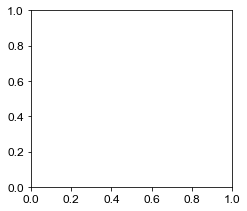

In [108]:
plt.rcParams.update(params)
plt.figure(1)
plt.clf()
plt.axes([leftmargin,
            bottommargin,
            1.0 - rightmargin-leftmargin,
            1.0 - topmargin-bottommargin])

### CUE

In [109]:
var = [5,4,3,2,1]
rel_inf = [39.50, 20.57, 8.77, 6.60, 6.19]

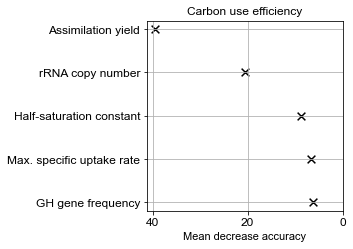

In [111]:
plt.scatter(x=rel_inf, y=var, s=60, marker='x', color='k', label = "")
plt.grid(True)
plt.ylabel("")
plt.xlabel("Mean decrease accuracy")
#plt.legend()
plt.title("Carbon use efficiency")
ax = plt.gca()
ax.set_xticks([40,20,0])
ax.invert_xaxis()
ax.set_yticks([1, 2, 3, 4, 5])
ax.set_yticklabels(["GH gene frequency", "Max. specific uptake rate", "Half-saturation constant", "rRNA copy number", "Assimilation yield"])
plt.savefig("/Users/glmarschmann/.julia/dev/DEBmicroTrait/pnas/figures_suppl/batch_rf_cue.svg", format='svg')

### Growth rate

In [112]:
var = [5,4,3,2,1]
rel_inf = [45.34, 21.21, 7.64, 5.35, 1.72]

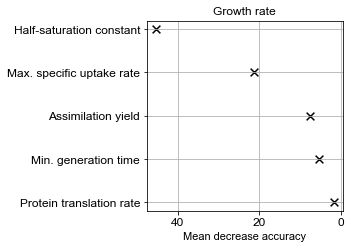

In [114]:
plt.scatter(x=rel_inf, y=var, s=60, marker='x', color='k', label = "")
plt.grid(True)
plt.ylabel("")
plt.xlabel("Mean decrease accuracy")
#plt.legend()
plt.title("Growth rate")
ax = plt.gca()
ax.set_xticks([40,20,0])
ax.invert_xaxis()
ax.set_yticks([1, 2, 3, 4, 5])
ax.set_yticklabels(["Protein translation rate", "Min. generation time", "Assimilation yield", "Max. specific uptake rate", "Half-saturation constant"])
plt.savefig("/Users/glmarschmann/.julia/dev/DEBmicroTrait/pnas/figures_suppl/batch_rf_growth.svg", format='svg')

# Assimilation benchmarks

In [89]:
df = pd.read_csv("/Users/glmarschmann/.julia/dev/DEBmicroTrait/files/isolates_assimilation_name.csv")
df["cell_radius"] = (3/(4*np.pi)*df.cell_size)**(1/3)*1e6
df["yDE"] = 1/df["yield"]
df.head()

,transporter_density,Vmax,KD,affinity,ontology,name,diffusivity,zdistr,response,genome_size,cell_size,mingt,sav,yield,cell_radius,yDE
0,0.003192,0.136527,0.000863,158.253125,Amino acids,2-aminoisobutyric acid,7.283438e-10,0.732558,positive,6679185,2.537341e-17,7.0,1.645727e+06,0.250000,1.822902,4.000000
1,0.000026,0.001946,0.000127,15.314888,Organic acids,"2,3-Dihydroxybenzoic acid",6.236958e-10,0.011628,positive,6679185,2.537341e-17,7.0,1.645727e+06,0.164615,1.822902,6.074766
2,0.000026,0.001946,0.000133,14.675118,Organic acids,3-Dehydroshikimic acid,5.976413e-10,0.011628,positive,6679185,2.537341e-17,7.0,1.645727e+06,0.164615,1.822902,6.074766
3,0.002394,0.127995,0.000707,181.133816,Amino acids,5-aminovaleric acid,6.933574e-10,0.732558,positive,6679185,2.537341e-17,7.0,1.645727e+06,0.200000,1.822902,5.000000
4,0.000011,0.001741,0.000151,11.512509,Organic acids,abscisic acid,5.064613e-10,0.011628,positive,6679185,2.537341e-17,7.0,1.645727e+06,0.066667,1.822902,15.000000


In [9]:
fig_width = 4.5                        # inches  
golden_mean = (np.sqrt(5)-1.0)/2.0      # Aesthetic ratio
fig_height = 3.5      # height in inches
dpi = 300.0  
# Margins are specified as a fraction of axes size.
# May need to adjust (especially left and bottom) to accomodate axes labels/tickmarks
leftmargin = 0.15
bottommargin = 0.2
rightmargin = 0.05
topmargin = 0.1
# These two parameters are used for adjusting spacing between subplots (when used)
wspace = 0.2
hspace = 0.2

fig_size =  [fig_width,fig_height]
params = {'backend': 'svg',
          'axes.labelsize': 12,
          'axes.titlesize': 12,
          'legend.fontsize': 10,
          'xtick.labelsize': 12,
          'ytick.labelsize': 12,
          'figure.figsize': fig_size,
          'text.usetex': False, 
          'font.family':'sans-serif',
          'font.sans-serif':'Arial',
          'svg.fonttype':'none'}

<Axes:>

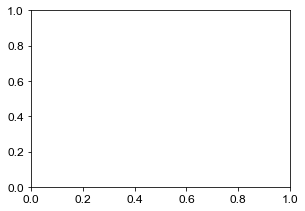

In [10]:
plt.rcParams.update(params)
plt.figure(1)
plt.clf()
plt.axes([leftmargin,
            bottommargin,
            1.0 - rightmargin-leftmargin,
            1.0 - topmargin-bottommargin])

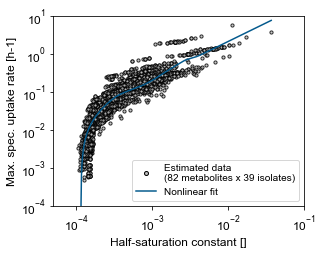

In [34]:
from matplotlib.lines import Line2D
ax = plt.gca()
ax = sns.regplot(x="KD", y="Vmax", data=df,lowess=True, line_kws={"color":"#045a8d","alpha":1.0,"lw":1.5}, scatter_kws={"color":"#bdbdbd", "edgecolors":"k", "s":10}, ax=ax, truncate=True);
plt.xscale('log') 
plt.yscale('log') 
plt.minorticks_off()
ax.set_ylim([1e-4, 1e1])
#ax.set_yticklabels([1e-4, 1e-3, 1e-2, 1e-1, 1e0])
ax.set_xlim([5e-5, 1e-1])
plt.xlabel("Half-saturation constant []")
plt.ylabel("Max. spec. uptake rate [h-1]")
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Estimated data \n(82 metabolites x 39 isolates)',
                          markerfacecolor='#bdbdbd',markeredgecolor="k", markersize=4),
                  Line2D([0], [0], color='#045a8d', lw=1.5, label='Nonlinear fit')]
ax.legend(handles=legend_elements, loc='best')
plt.savefig("/Users/glmarschmann/.julia/dev/DEBmicroTrait/pnas/figures_suppl/Vmax_K_tradeoff.svg", format="svg")

<Axes:>

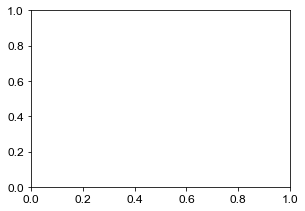

In [35]:
plt.rcParams.update(params)
plt.figure(1)
plt.clf()
plt.axes([leftmargin,
            bottommargin,
            1.0 - rightmargin-leftmargin,
            1.0 - topmargin-bottommargin])

In [29]:
df_glucose = df.loc[(df.name == "glucose")]
df_glucose["SAV"] = np.log(df_glucose["sav"]/1e6)
df_glucose["logaffinity"] = np.log(df_glucose["affinity"])
df_glucose.head()

/Users/glmarschmann/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/glmarschmann/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,transporter_density,Vmax,KD,affinity,ontology,name,diffusivity,zdistr,response,genome_size,cell_size,mingt,sav,yield,cell_radius,SAV,logaffinity
28,0.000586,0.037584,0.000300,125.164710,Sugars,glucose,5.872272e-10,0.220930,positive,6679185,2.537341e-17,7.00,1.645727e+06,0.178333,1.822902,0.498182,4.829631
111,0.007771,0.560290,0.001754,319.424918,Sugars,glucose,5.872272e-10,0.292929,negative,5377210,9.035809e-18,1.31,2.321819e+06,0.178333,1.292090,0.842351,5.766522
194,0.001502,0.114327,0.000423,270.009796,Sugars,glucose,5.872272e-10,0.195489,undefined,5177578,7.546182e-18,2.78,2.465519e+06,0.178333,1.216782,0.902402,5.598458
277,0.000322,0.020532,0.000229,89.643508,Sugars,glucose,5.872272e-10,0.104439,positive,6972827,3.114275e-17,6.09,1.537087e+06,0.178333,1.951744,0.429889,4.495841
360,0.000527,0.033485,0.000302,110.769404,Sugars,glucose,5.872272e-10,0.159806,positive,7193102,3.611417e-17,5.73,1.463047e+06,0.178333,2.050515,0.380521,4.707451


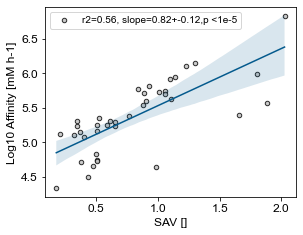

In [36]:
ax = plt.gca()
ax = sns.regplot(x="SAV", y="logaffinity", data=df_glucose, line_kws={"color":"#045a8d","alpha":1.0,"lw":1.5}, scatter_kws={"color":"#bdbdbd", "edgecolors":"k", "s":20}, ax=ax, truncate=True, label="r2=0.56, slope=0.82+-0.12,p <1e-5")
#ax.set_yscale("log")
#ax.set_xscale("log")
#ax.set_ylim([0.1, 200])
#ax.set_xlim([1, 8])
#ax.set_xticks([2, 3, 4,5, 6,7, 8])
#ax.set_xticklabels([2, 3, 4,5, 6,7, 8])
#ax.set_yticks([0,500, 1000])
plt.xlabel("SAV []")
plt.ylabel("Log10 Affinity [mM h-1]")
plt.legend()
plt.savefig("/Users/glmarschmann/.julia/dev/DEBmicroTrait/pnas/figures_suppl/affinity_SAV_glucose.svg", format="svg")#

In [90]:
fig_width = 6.2                         # inches  
golden_mean = (np.sqrt(5)-1.0)/2.0      # Aesthetic ratio
fig_height = fig_width*golden_mean      # height in inches
dpi = 300.0                             # Convert inch to pt

# Margins are specified as a fraction of axes size.
# May need to adjust (especially left and bottom) to accomodate axes labels/tickmarks
leftmargin = 0.15
bottommargin = 0.2
rightmargin = 0.05
topmargin = 0.1
# These two parameters are used for adjusting spacing between subplots (when used)
wspace = 0.2
hspace = 0.2

fig_size =  [fig_width,fig_height]
params = {'backend': 'svg',
          'axes.labelsize': 12,
          'axes.titlesize': 12,
          'legend.fontsize': 10,
          'xtick.labelsize': 10,
          'ytick.labelsize': 12,
          'figure.figsize': fig_size,
          'text.usetex': False, 
          'font.family':'sans-serif',
          'font.sans-serif':'Arial',
          'svg.fonttype':'none'}

<Axes:>

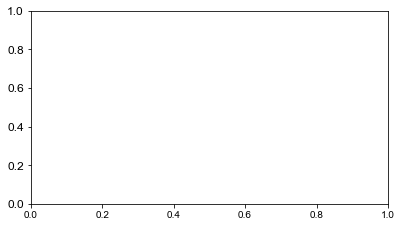

In [91]:
plt.rcParams.update(params)
plt.figure(1)
plt.clf()
plt.axes([leftmargin,
            bottommargin,
            1.0 - rightmargin-leftmargin,
            1.0 - topmargin-bottommargin])

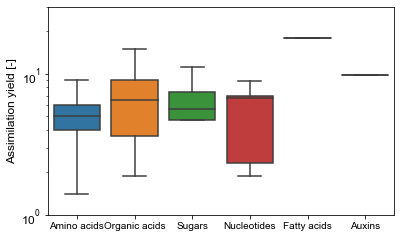

In [104]:
ax = plt.gca()
ax = sns.boxplot(x="ontology", y="yDE", data=df, showfliers=False, order=[
                 'Amino acids', 'Organic acids', 'Sugars', 'Nucleotides', 'Fatty acids', 'Auxins'])
ax.set(yscale="log")
ax.set(ylabel='', xlabel='')
ax.set_ylim([1, 30])
plt.ylabel("Assimilation yield [-]")
plt.savefig("/Users/glmarschmann/.julia/dev/DEBmicroTrait/pnas/figures_suppl/suppl_class_yield.svg", format="svg")

In [ ]:
fig_width = 4.5                        # inches  
golden_mean = (np.sqrt(5)-1.0)/2.0      # Aesthetic ratio
fig_height = 3.5      # height in inches
dpi = 300.0  
# Margins are specified as a fraction of axes size.
# May need to adjust (especially left and bottom) to accomodate axes labels/tickmarks
leftmargin = 0.15
bottommargin = 0.2
rightmargin = 0.05
topmargin = 0.1
# These two parameters are used for adjusting spacing between subplots (when used)
wspace = 0.2
hspace = 0.2

fig_size =  [fig_width,fig_height]
params = {'backend': 'svg',
          'axes.labelsize': 12,
          'axes.titlesize': 12,
          'legend.fontsize': 10,
          'xtick.labelsize': 12,
          'ytick.labelsize': 12,
          'figure.figsize': fig_size,
          'text.usetex': False, 
          'font.family':'sans-serif',
          'font.sans-serif':'Arial',
          'svg.fonttype':'none'}

In [37]:
df = pd.read_csv("/Users/glmarschmann/.julia/dev/DEBmicroTrait/files/benchmark_uptake_kinetics.csv")
df.shape

(13, 9)

In [38]:
dfout = pd.read_csv("/Users/glmarschmann/.julia/dev/DEBmicroTrait/files/benchmark_uptake_kinetics_outliers.csv")
dfout.shape

(3, 9)

<Axes:>

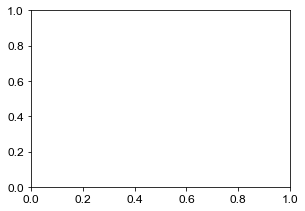

In [39]:
plt.rcParams.update(params)
plt.figure(1)
plt.clf()
plt.axes([leftmargin,
            bottommargin,
            1.0 - rightmargin-leftmargin,
            1.0 - topmargin-bottommargin])

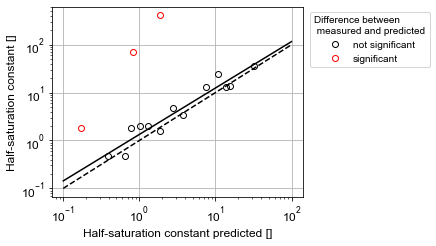

In [41]:
plt.plot(df["Ktmodel"], df["Kt"], 'o', mfc='none', mec='k', ms=6, label="not significant")
plt.plot(dfout["Ktmodel"], dfout["Kt"], 'o', mfc='none', mec='r', ms=6, label="significant")
x = np.linspace(1e-1,1e2,100)
y = x
y1 = np.exp(0.29)*x**0.97
plt.plot(x, y, '--', c='k', label="")
plt.plot(x, y1, '-', c='k', label="")
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.ylabel("Half-saturation constant []")
plt.xlabel("Half-saturation constant predicted []")
plt.legend(title="Difference between\n measured and predicted", bbox_to_anchor=(1.01, 1))
plt.savefig("/Users/glmarschmann/.julia/dev/DEBmicroTrait/pnas/figures_suppl/benchmark_uptake kinetics.svg", format='svg')

# Translation power

In [45]:
f = h5py.File("/Users/glmarschmann/.julia/dev/DEBmicroTrait/files/generic_rate_yield_trade_off.jld", "r")
yield45 = f["yield_45"]
rate45 = f["rate_45"]

<Axes:>

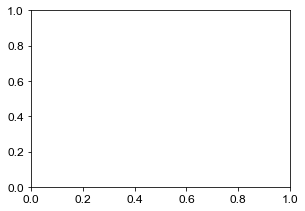

In [46]:
plt.rcParams.update(params)
plt.figure(1)
plt.clf()
plt.axes([leftmargin,
            bottommargin,
            1.0 - rightmargin-leftmargin,
            1.0 - topmargin-bottommargin])

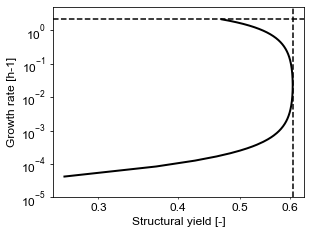

In [52]:
ax = plt.axes()  
plt.plot(yield45[:], rate45[:]*4.2, '-', lw=2, color="k")
plt.axhline(y=max(rate45)*4.2, linestyle='--',color="k")
plt.axvline(x=max(yield45), linestyle='--',color="k")
plt.xscale('log') 
plt.yscale('log') 
#plt.xlabel(r"$\textnormal{Growth yield}\,\, [\,\textnormal{-}\,]$")
#plt.ylabel(r"$\textnormal{Growth power}\, \mathrm{[\Delta G\, C\textnormal{-} mol^{-1}h^{-1}]}$")
plt.xlabel("Structural yield [-]")
plt.ylabel("Growth rate [h-1]")
#ax.set_xlim([0.25, 0.62])
ax.set_ylim([1e-5, 5e0])
#from matplotlib.ticker import StrMethodFormatter, NullFormatter
ax.xaxis.set_minor_formatter(StrMethodFormatter('{x:.1f}'))
ax.yaxis.set_tick_params(which='minor', bottom=False)
plt.savefig("/Users/glmarschmann/.julia/dev/DEBmicroTrait/pnas/figures_suppl/generic_power_yield.svg", format='svg')

In [70]:
df = pd.read_csv("/Users/glmarschmann/.julia/dev/DEBmicroTrait/files/benchmark_protein_synthesis.csv")
df.head()

,V_P,V_R,gmax,V_cell,k_E,V_cell_model,V_P_model,V_R_model,tRNA_model,mRNA_model,V_mtR_model,k_E_model,diff
0,2.101147e-19,6.097366e-20,0.941429,2.752857e-18,3.244155,1.909016e-16,1.745318e-19,6.414248e-20,1.144949e-21,6.133402e-21,7.142083e-20,2.561630,-0.682525
1,3.240876e-19,8.603352e-20,0.677500,4.450000e-18,2.552137,3.977441e-16,2.442745e-19,6.905343e-20,1.601941e-21,8.581470e-21,7.923684e-20,2.396636,-0.155501
2,1.003650e-19,1.536313e-20,0.333500,1.950000e-18,2.178704,2.431404e-18,1.371041e-19,2.378735e-20,8.987359e-22,4.814456e-21,2.950054e-20,1.922207,-0.256497
3,6.861314e-20,1.284916e-20,0.545000,2.400000e-18,2.910241,3.761208e-20,1.585528e-19,3.812387e-20,1.039610e-21,5.569108e-21,4.473259e-20,2.266593,-0.643648
4,9.489051e-20,1.620112e-20,0.470000,2.300000e-18,2.752806,3.761208e-20,1.538989e-19,3.334090e-20,1.009001e-21,5.405136e-21,3.975503e-20,2.169482,-0.583324


In [74]:
df_non = df[:-1]
df_non.head()

,V_P,V_R,gmax,V_cell,k_E,V_cell_model,V_P_model,V_R_model,tRNA_model,mRNA_model,V_mtR_model,k_E_model,diff
0,2.101147e-19,6.097366e-20,0.941429,2.752857e-18,3.244155,1.909016e-16,1.745318e-19,6.414248e-20,1.144949e-21,6.133402e-21,7.142083e-20,2.561630,-0.682525
1,3.240876e-19,8.603352e-20,0.677500,4.450000e-18,2.552137,3.977441e-16,2.442745e-19,6.905343e-20,1.601941e-21,8.581470e-21,7.923684e-20,2.396636,-0.155501
2,1.003650e-19,1.536313e-20,0.333500,1.950000e-18,2.178704,2.431404e-18,1.371041e-19,2.378735e-20,8.987359e-22,4.814456e-21,2.950054e-20,1.922207,-0.256497
3,6.861314e-20,1.284916e-20,0.545000,2.400000e-18,2.910241,3.761208e-20,1.585528e-19,3.812387e-20,1.039610e-21,5.569108e-21,4.473259e-20,2.266593,-0.643648
4,9.489051e-20,1.620112e-20,0.470000,2.300000e-18,2.752806,3.761208e-20,1.538989e-19,3.334090e-20,1.009001e-21,5.405136e-21,3.975503e-20,2.169482,-0.583324


In [84]:
df_out = df.iloc[-1]

<Axes:>

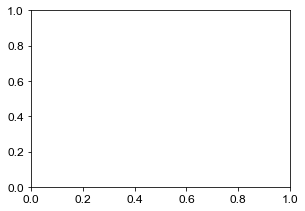

In [85]:
plt.rcParams.update(params)
plt.figure(1)
plt.clf()
plt.axes([leftmargin,
            bottommargin,
            1.0 - rightmargin-leftmargin,
            1.0 - topmargin-bottommargin])

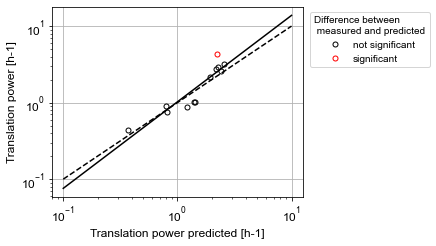

In [87]:
plt.plot(df_non["k_E_model"], df_non["k_E"], 'o', mfc='none', mec='k', ms=5, label="not significant")
plt.plot(df_out["k_E_model"], df_out["k_E"], 'o', mfc='none', mec='r', ms=5, label="significant")
x = np.linspace(1e-1,1e1,100)
y = x
y1 = np.exp(0.023)*x**1.13
plt.plot(x, y, '--', c='k', label="")
plt.plot(x, y1, '-', c='k', label="")
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.ylabel("Translation power [h-1]")
plt.xlabel("Translation power predicted [h-1]")
plt.legend(title="Difference between\n measured and predicted", bbox_to_anchor=(1.01, 1))
plt.savefig("/Users/glmarschmann/.julia/dev/DEBmicroTrait/pnas/figures_suppl/benchmark_protein_synthesis.svg", format='svg')

In [61]:
df = pd.read_csv("/Users/glmarschmann/.julia/dev/DEBmicroTrait/files/isolates_max_yield.csv")

<Axes:>

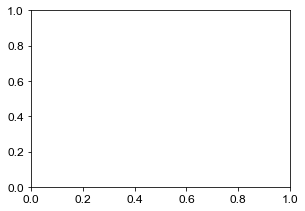

In [62]:
plt.rcParams.update(params)
plt.figure(1)
plt.clf()
plt.axes([leftmargin,
            bottommargin,
            1.0 - rightmargin-leftmargin,
            1.0 - topmargin-bottommargin])

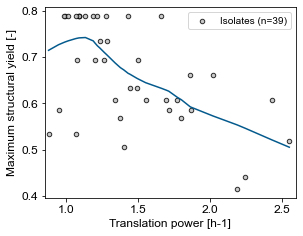

In [65]:
from matplotlib.lines import Line2D
ax = plt.gca()
ax = sns.regplot(x="kE", y="yvmax", data=df, lowess=True, line_kws={"color":"#045a8d","alpha":1.0,"lw":1.5}, scatter_kws={"color":"#bdbdbd", "edgecolors":"k", "s":20}, ax=ax, truncate=False, label="Isolates (n=39)")
ax.set_xlim([0.85, 2.6])
#ax.set_ylim([0.3, 0.81])
plt.xlabel("Translation power [h-1]")
plt.ylabel("Maximum structural yield [-]")
ax.legend( loc='best')
plt.savefig("/Users/glmarschmann/.julia/dev/DEBmicroTrait/pnas/figures_suppl/isolates_max_yield.svg", format='svg')

# Levin's index

In [11]:
df_levin = pd.read_csv("/Users/glmarschmann/.julia/dev/DEBmicroTrait/files/isolates_batch_model_bge_levin.csv")
df_levin.head()

,isolate,BGE_med,levins,response
0,Acidobacteriaceae bacterium URHE0068,0.630717,0.458870,positive
1,Bacillus sp. URHB0009,0.378302,0.911913,negative
2,Blastococcus sp. URHD0036,0.445137,0.480510,undefined
3,Bradyrhizobium sp. URHA0002,0.630696,0.790844,positive
4,Bradyrhizobium sp. URHA0013,0.630861,0.767366,positive


In [12]:
df_levin_p = df_levin.loc[(df_levin.response == "positive")]
df_levin_n = df_levin.loc[(df_levin.response == "negative")]
df_levin_u = df_levin.loc[(df_levin.response == "undefined")]

<Axes:>

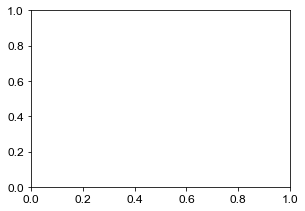

In [13]:
plt.rcParams.update(params)
plt.figure(1)
plt.clf()
plt.axes([leftmargin,
            bottommargin,
            1.0 - rightmargin-leftmargin,
            1.0 - topmargin-bottommargin])

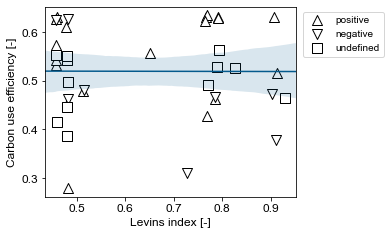

In [41]:
plt.scatter(df_levin_p.levins, df_levin_p.BGE_med, s=100, color='w', edgecolor='k', marker='^', label="positive")
plt.scatter(df_levin_n.levins, df_levin_n.BGE_med, s=100, color='w', edgecolor='k', marker='v', label="negative")
plt.scatter(df_levin_u.levins, df_levin_u.BGE_med, s=100, color='w', edgecolor='k', marker='s', label="undefined")
ax = plt.gca()
ax = sns.regplot(x="levins", y="BGE_med", data=df_levin, line_kws={"color":"#045a8d","alpha":1.0,"lw":1.5}, scatter_kws={"color":"none", "edgecolors":"none", "s":0}, ax=ax, truncate=False, label="")
plt.ylabel("Carbon use efficiency [-]")
plt.xlabel("Levins index [-]")
plt.legend(bbox_to_anchor=(1.01, 1))
plt.savefig("/Users/glmarschmann/.julia/dev/DEBmicroTrait/pnas/figures_suppl/batch_levins.svg", format='svg')

<Axes:>

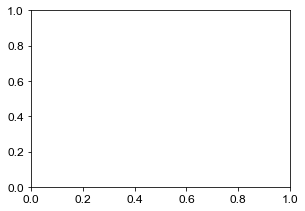

In [23]:
plt.rcParams.update(params)
plt.figure(1)
plt.clf()
plt.axes([leftmargin,
            bottommargin,
            1.0 - rightmargin-leftmargin,
            1.0 - topmargin-bottommargin])

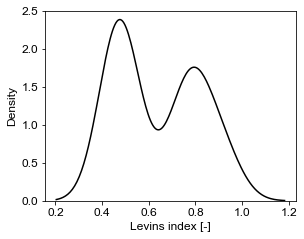

In [31]:
ax = plt.gca()
ax = sns.kdeplot(df_levin.levins, color='k')
ax.set(xlabel="Levins index [-]", ylabel="Density")
plt.savefig("/Users/glmarschmann/.julia/dev/DEBmicroTrait/pnas/figures_suppl/batch_levins_density.svg", format='svg')